In [7]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from ipywidgets import interact, FloatSlider, Label

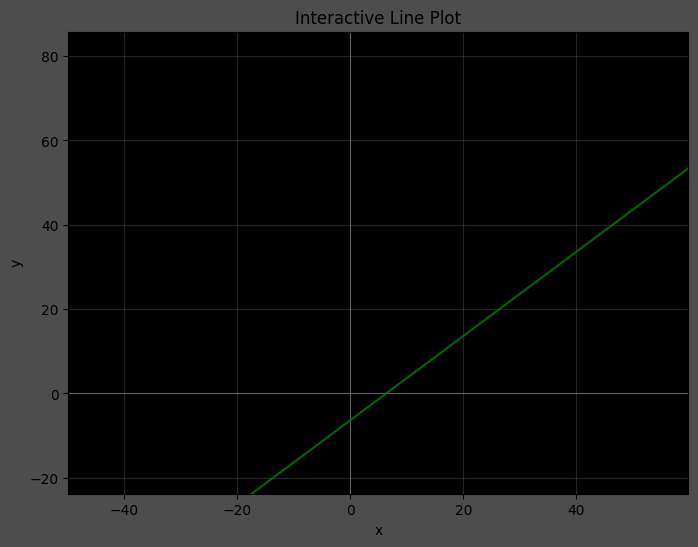

In [2]:
def plot_line(m, b, zoom, shift, move):
    x = np.arange(-200, 200, 5)
    y = m * x + b

    plt.figure(figsize=(8, 6), facecolor='.3')
    plt.axes().set_facecolor('black')
    plt.axhline(0, color='grey', linewidth=0.5)  
    plt.axvline(0, color='grey', linewidth=0.5)  
    plt.plot(x, y, color='green', alpha=.8)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interactive Line Plot')
    plt.grid(True, alpha=.2)
    plt.xlim(-zoom + shift, zoom + shift)  
    plt.ylim(-zoom + move, zoom + move)  
    plt.show()

   
    equation = f'f(x) = {round(m, 3)}x + {round(b, 3) }'
    display_label.value = equation


m_slider = FloatSlider(min=-10, max=10, step=0.2, value=1)
b_slider = FloatSlider(min=-100, max=100, step=0.2, value=0)
zoom_slider = FloatSlider(min=1, max=100, step=0.1, value=50)
shift_slider = FloatSlider(min=-100, max=100, step=1, value=0)
move_slider = FloatSlider(min=-100, max=100, step=1, value=0)

display_label = Label()
display(display_label)
interact(plot_line, m=m_slider, b=b_slider, zoom=zoom_slider, shift=shift_slider, move=move_slider)

In [3]:
def plot_line(m, b):
    x = np.arange(-200, 200, 5)
    y = m * x + b

    plt.figure(figsize=(12, 6), facecolor='.3')

    ax1 = plt.subplot(121)
    ax1.set_facecolor('black')
    ax1.axhline(0, color='grey', linewidth=0.5)
    ax1.axvline(0, color='grey', linewidth=0.5)
    ax1.plot(x, y, color='green', alpha=0.8)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Interactive Line Plot')
    ax1.grid(True, alpha=0.2)
    ax1.set_xlim(-100, 100)
    ax1.set_ylim(-100, 100)

    ax2 = plt.subplot(122)
    ax2.set_facecolor('black')
    ax2.scatter(m, b, s=200)
    ax2.set_xlabel('m')
    ax2.set_ylabel('b')
    ax2.set_title('Parameter Space')
    ax2.grid(True, alpha=0.2)
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-100, 100)    
    plt.show()

    equation = f'f(x) = {m}x + {b}'
    display_label.value = equation


m_slider = FloatSlider(min=-10, max=10, step=0.5, value=1)
b_slider = FloatSlider(min=-100, max=100, step=1, value=0)

display_label = Label()
display(display_label)
interact(plot_line, m=m_slider, b=b_slider)

Label(value='')

interactive(children=(FloatSlider(value=1.0, description='m', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…

<function __main__.plot_line(m, b)>

In [5]:
def interactive_polypow3(a, b, c, d, zoom):
    
    F = lambda x: a*x**3 + b*x**2 + c*x + d
    f = lambda x: 3*a*x**2 + 2*b*x + c
    df1 = lambda x: 6*a*x +2*b

    x = np.arange(-30, 30, .1)

    fig, axs = plt.subplots(1, 3, facecolor='0.3',figsize=(12, 4),sharey = True)
    
    axs[0].plot(x, F(x), c = 'green')
    axs[1].plot(x, f(x), c = 'green')
    axs[2].plot(x, df1(x),c ='green')
    axs[0].set_title("F(x) = {}x³+{}x²+{}x+{}".format(a,b,c,d))
    axs[1].set_title("f(x) = {}x²+{}x+{}".format(3*a,2*b,c))
    axs[2].set_title("df1(x) = {}x+{}".format(6*a,2*b))

    for n in range(3):
        axs[n].set_facecolor('black')
        axs[n].axhline(y=0, c='white', lw=0.1,zorder=0)
        axs[n].axvline(x=0, c='white', lw=0.1,zorder=0)
        axs[n].set_xlim(-zoom, zoom)
        axs[n].set_ylim(-zoom, zoom)
        axs[n].grid(alpha=.2)
    plt.show()
    

a_slider = FloatSlider(min=-5, max=5, step=.5, value=0)
b_slider = FloatSlider(min=-10, max=10, step=.5, value=0)
c_slider = FloatSlider(min=-10, max=10, step=.5, value=0)
d_slider = FloatSlider(min=-10, max=10, step=.5, value=0)
zoom_slider = FloatSlider(min=1, max=100, step=1, value=10)

interact(interactive_polypow3, a=a_slider, b=b_slider, c=c_slider, d=d_slider, zoom=zoom_slider)

interactive(children=(FloatSlider(value=0.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.interactive_polypow3(a, b, c, d, zoom)>

interactive(children=(FloatSlider(value=1.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.degree.<locals>.interactive_polypown(a, b, c, d, zoom)>

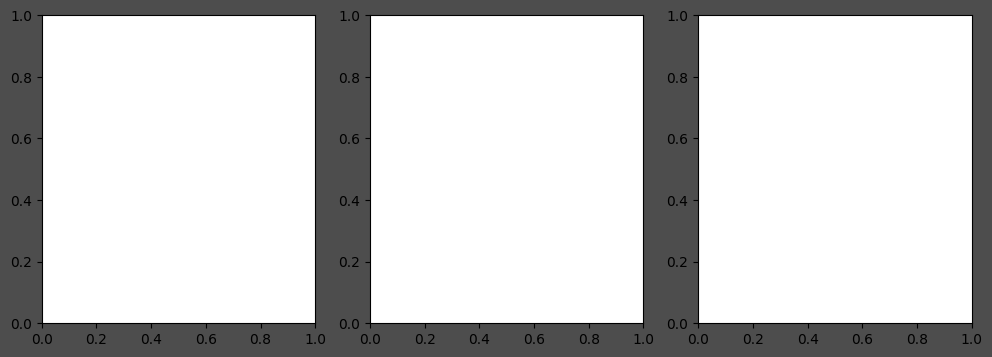

In [17]:
def degree(power):
    '''please don't go lower than power of 3 otherwise it will not work as intended'''
    def interactive_polypown(a, b, c, d, zoom):

        create_polynomial = lambda coeffs: sum(coeffs[i]*x**i for i in range(len(coeffs)))
        x = sp.symbols('x')
        co = [0] * (power - 4)  + [d,c,b,a]
        F = create_polynomial(co)
        f = sp.diff(F, x)
        df = sp.diff(sp.diff(F, x), x)
        F1 = sp.lambdify(x, F, 'numpy')
        f1 = sp.lambdify(x, f, 'numpy')
        df1 = sp.lambdify(x, df, 'numpy')
        x_ = np.arange(-50, 50, .025)

        fig, axs = plt.subplots(1, 3, facecolor='.3',figsize=(12, 4))

        axs[0].plot(x_, F1(x_), c = 'green')
        if len(co) == 3:
            axs[2].axhline(y=2*co[2],c='green')
            axs[1].plot(x_, f1(x_), c = 'green')
        elif len(co) == 2:
            axs[1].axhline(y=co[1],c='green')
        else:
            axs[1].plot(x_, f1(x_), c = 'green')
            axs[2].plot(x_, df1(x_),c ='green')
        axs[0].set_title("F(x) = {}".format(F), fontsize=7)
        axs[1].set_title("f(x) = {}".format(f), fontsize=7)
        axs[2].set_title("df1(x) = {}".format(df), fontsize=7)

        for n in range(3):
            axs[n].set_facecolor('black')
            axs[n].axhline(y=0, c='white', lw=0.1,zorder=0)
            axs[n].axvline(x=0, c='white', lw=0.1,zorder=0)
            axs[n].set_xlim(-zoom, zoom)
            axs[n].set_ylim(-zoom, zoom)
        plt.show()
        
    return interactive_polypown
    
a_slider = FloatSlider(min=-5, max=5, step=.5, value=1)
b_slider = FloatSlider(min=-10, max=10, step=.5, value=1)
c_slider = FloatSlider(min=-10, max=10, step=.5, value=1)
d_slider = FloatSlider(min=-10, max=10, step=.5, value=1)
zoom_slider = FloatSlider(min=.5, max=100, step=1, value=3)

interact(degree(7), a=a_slider, b=b_slider, c=c_slider, d=d_slider, zoom=zoom_slider)

In [14]:
a = [1,1,3,3]

In [22]:
[0] * 2

[0, 0]